## Reproduce eBOSS 2020 results (NP20+, 1911.09073): Minuit fit of the Taylor grid

EA - Dec 2023+ <br>
Reproducing the main result: LCDM fit of Lya-only data.

This notebook makes use of `lym1d`.
An older version exists which makes use of the `Lya_DESI` likelihood within `montepython`

In [4]:
import os, sys
#sys.path.insert(0, os.environ['HOME']+'/directory/to/lym1d/src')  # (if custom code install)

import numpy as np
import matplotlib.pyplot as plt

import lym1d
from lym1d import lym1d
from iminuit_interface import read_minuitparams, RunMinuit, lym1d_chi2_wrapper

# Need to edit those:
#datadir = os.environ['HOME'] + '/directory/to/montepython/data/Lya_DESI'  # data is not in github repo
path_nersc = '/global/cfs/cdirs/desi/science/lya/y1-p1d/likelihood_files/'  # data is not in github repo
models_path = 'nyx_files/models_Nyx_Oct2023.hdf5'
emupath = 'taylor_files'
data_path='data_files/Chabanier19'
ref_minuitfile = 'lya_fitpars_np20_v1.yaml'  # yaml file for minuit

ModuleNotFoundError: No module named 'lym1d'

In [ ]:
# Initialize lym1d
runmode, Anmode = 'taylor', 'sigma'
hascor = {'noise': True,
          'DLA': False,
          'reso': False,
          'SN': True,
          'AGN': True,
          'zreio': False,
          'SiIII': True,
          'SiII': True,
          'norm': False,
          'UV': True,
          'IC': False,
          'splice':True}
splice_kind = 2
zmin, zmax = 2.2, 4.6
zlist_thermo = [2.2, 2.4, 2.6, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0, 4.2, 4.4, 4.6]
datafile = 'pk_1d_DR12_13bins.out'
invcovfile = 'pk_1d_DR12_13bins_invCov.out'

lym1d_obj = lym1d(
        base_directory=path_nersc,
        models_path=models_path,
        emupath=emupath,
        data_path = data_path,
        runmode=runmode, has_cor=hascor, zmin=zmin, zmax=zmax,
        zs=zlist_thermo, data_filename=datafile,
        inversecov_filename=invcovfile, splice_kind=splice_kind)


## Baseline fit

Uses parameters as given in lya_fitpars_np20_v1.yaml files

- Matches exactly NP20+ result (table 3, frequentist mnu=0)
- Prior on thermal params as (wrongly) coded in C++ likelihood (-1+-2), instead of the more reasonable prior printed in table 2 of NP20+
- Prior on splicing as printed in table 2 of NP20+ (0+-2.5)
- Varying UV flucts
- Si correction as coded in C++ likelihood
- AGN correction (almost) as interpolated in C++ likelihood


In [2]:
minuit_pars = read_minuitparams(ref_minuitfile)
minuitobj = RunMinuit(lym1d_obj, minuit_pars, function=lym1d_chi2_wrapper, 
                      verbose=True, minos=False)
print(minuitobj.params)
print(minuitobj.fmin)


NameError: name 'read_minuitparams' is not defined

In [4]:
minuitobj.covariance.correlation()

,Omega_m,n_s,sigma8,h,m_nu,T0,gamma,T0SlopeInf,T0SlopeSup,gammaSlopeInf,AmpTauEff,SlopeTauEff,fSiIII,fSiII,Lya_DLA,Lya_AGN,Lya_SN,Lya_UVFluct,SplicingCorr,SplicingOffset,ResoAmpl,ResoSlope,noise1,noise2,noise3,noise4,noise5,noise6,noise7,noise8,noise9,noise10,noise11,noise12,noise13
Omega_m,1,-0.4,0.4,0,0,-0.2,-0.2,-0.3,-0.2,0.2,0,-0.2,-0.1,0.1,0,0,0,0,0,-0.3,0,0,-0.1,0,0,0.1,0,0,0,0,0,0,0,0,0
n_s,-0.4,1,0,-0.3,0,0.4,-0.3,0.4,0.1,-0.2,-0.5,0.1,-0.1,0,0,-0.4,0.2,0,0,0.1,0,0,0.1,0,0,0,0,0,-0.1,-0.1,-0.1,-0.1,0,0,0
sigma8,0.4,0,1,0,0,-0.4,-0.1,-0.4,-0.1,0.1,-0.1,-0.2,0,0,0,0.1,-0.1,0,0,-0.3,0,0,0,0.1,0.1,0.1,0.1,0,0,0,0,0,0,0,0
h,0,-0.3,0,1,0,-0.1,0.1,-0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
m_nu,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
T0,-0.2,0.4,-0.4,-0.1,0,1,-0.6,0.6,-0.1,0.2,-0.1,-0.3,-0.1,0,0,0,-0.2,0,0,0.1,0,0,0.1,0,0.1,0.1,0.1,0.1,0.1,0.1,0,0,0,0,0
gamma,-0.2,-0.3,-0.1,0.1,0,-0.6,1,-0.1,0.5,-0.5,0.3,0.4,0.1,0,0,0,0,0,-0.1,0.3,0,0,0.1,0,-0.1,-0.1,0,0,0,0,0,0,0,0,0
T0SlopeInf,-0.3,0.4,-0.4,-0.1,0,0.6,-0.1,1,0.2,-0.4,-0.3,-0.1,0,0,0,-0.3,0.1,0,0.1,0,0,0,0.2,0.1,0,0,0,0.1,0.1,0.1,0,0,0,0,0
T0SlopeSup,-0.2,0.1,-0.1,0,0,-0.1,0.5,0.2,1,-0.2,0.1,-0.2,0,0,0,-0.2,0.1,0,0,-0.1,0,0,0.1,0,0,0,0.2,0.1,0.1,0.1,0.1,0,0,0,0
gammaSlopeInf,0.2,-0.2,0.1,0,0,0.2,-0.5,-0.4,-0.2,1,0.6,-0.6,0,0,0,0.2,-0.2,0,0,-0.1,0,0,-0.1,0,0,0.1,0,-0.1,-0.1,0,0,0,0,0,0


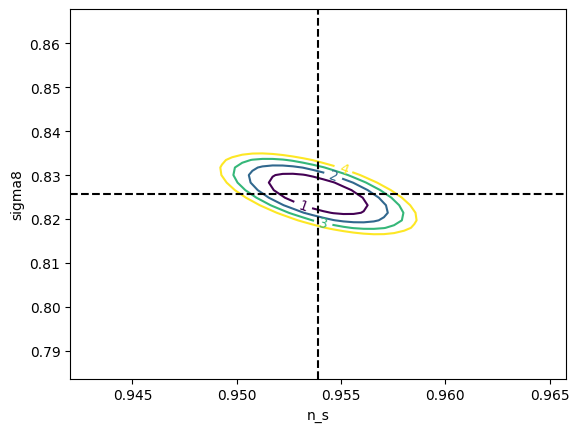

In [5]:
# this takes some time:
pp = minuitobj.draw_contour("n_s", "sigma8")

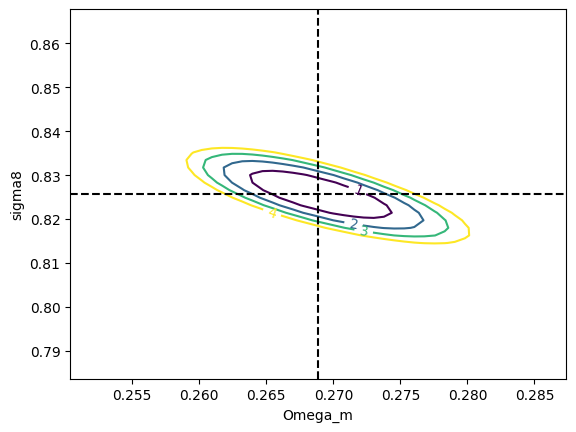

In [6]:
# this also takes some time:
pp = minuitobj.draw_contour("Omega_m", "sigma8")

### Variant A) change prior on T0SlopeInf
There's an ambiguity on this prior between the paper, and the code.<br>
Most probably a sign mistake in the code.<br>
Here, change this prior to [1,2], as in Table 2 of NP20.

<b> ==> This makes the fit result change significantly: s8, T0. Chi2 is larger (+4)

In [7]:
minuit_pars['prior_T0SlopeInf'] = [1, 2]
minuitobj_a = RunMinuit(lym1d_obj, minuit_pars, function=lym1d_chi2_wrapper, 
                      verbose=True, minos=False)
minuit_pars['prior_T0SlopeInf'] = [-1, 2]  # return to baseline


* Minuit parameters:
    * Omega_m : 0.31 (varying)
    * n_s : 0.96 (varying)
    * sigma8 : 0.83 (varying)
    * h : 0.675 (varying)
    * T0 : 14000.0 (varying)
    * gamma : 1.0 (varying)
    * T0SlopeInf : -2 (varying)
    * T0SlopeSup : -4 (varying)
    * gammaSlopeInf : -0.1 (varying)
    * AmpTauEff : 0.0025 (varying)
    * SlopeTauEff : 3.7 (varying)
    * fSiIII : 0.0 (varying)
    * fSiII : 0.0 (varying)
    * Lya_AGN : 1 (varying)
    * Lya_SN : 1 (varying)
    * Lya_UVFluct : 0 (varying)
    * SplicingCorr : -2.0 (varying)
    * SplicingOffset : 0.01 (varying)
    * noise1 : 0.0 (varying)
    * noise2 : 0.0 (varying)
    * noise3 : 0.0 (varying)
    * noise4 : 0.0 (varying)
    * noise5 : 0.0 (varying)
    * noise6 : 0.0 (varying)
    * noise7 : 0.0 (varying)
    * noise8 : 0.0 (varying)
    * noise9 : 0.0 (varying)
    * noise10 : 0.0 (varying)
    * noise11 : 0.0 (varying)
    * noise12 : 0.0 (varying)
    * noise13 : 0.0 (varying)
    * m_nu : 0 (fixed)
    * Lya_DLA : 

In [8]:
print(minuitobj_a.params)
print(minuitobj_a.fmin)

┌───┬────────────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name           │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ Omega_m        │   0.268   │   0.009   │            │            │    0    │    1    │       │
│ 1 │ n_s            │   0.955   │   0.006   │            │            │  0.85   │   1.1   │       │
│ 2 │ sigma8         │   0.823   │   0.021   │            │            │   0.6   │    1    │       │
│ 3 │ h              │   0.67    │   0.01    │            │            │    0    │    1    │       │
│ 4 │ m_nu           │    0.0    │    0.2    │            │            │    0    │    1    │  yes  │
│ 5 │ T0             │   8.8e3   │   2.0e3   │            │            │    0    │  25000  │       │
│ 6 │ gamma          │   0.93    │   0.14    │            │            │   0.3   │    2    

### Variant B) change prior in splicing correction
Again an ambiguity between the code and paper.<br>
Here I stick to splice_kind = 2,<br>
but change the prior to [-0.9, 5.0], corresponding more to the logic of the code<br>

<b> ==> Does not change anything except error on SplicingCorr (whose fit value remains 0)

In [9]:
minuit_pars['prior_SplicingCorr'] = [-0.9, 5.0]
minuitobj_b = RunMinuit(lym1d_obj, minuit_pars, function=lym1d_chi2_wrapper, 
                      verbose=True, minos=False)
minuit_pars['prior_SplicingCorr'] = [0, 2.5]  # Return to baseline

* Minuit parameters:
    * Omega_m : 0.31 (varying)
    * n_s : 0.96 (varying)
    * sigma8 : 0.83 (varying)
    * h : 0.675 (varying)
    * T0 : 14000.0 (varying)
    * gamma : 1.0 (varying)
    * T0SlopeInf : -2 (varying)
    * T0SlopeSup : -4 (varying)
    * gammaSlopeInf : -0.1 (varying)
    * AmpTauEff : 0.0025 (varying)
    * SlopeTauEff : 3.7 (varying)
    * fSiIII : 0.0 (varying)
    * fSiII : 0.0 (varying)
    * Lya_AGN : 1 (varying)
    * Lya_SN : 1 (varying)
    * Lya_UVFluct : 0 (varying)
    * SplicingCorr : -2.0 (varying)
    * SplicingOffset : 0.01 (varying)
    * noise1 : 0.0 (varying)
    * noise2 : 0.0 (varying)
    * noise3 : 0.0 (varying)
    * noise4 : 0.0 (varying)
    * noise5 : 0.0 (varying)
    * noise6 : 0.0 (varying)
    * noise7 : 0.0 (varying)
    * noise8 : 0.0 (varying)
    * noise9 : 0.0 (varying)
    * noise10 : 0.0 (varying)
    * noise11 : 0.0 (varying)
    * noise12 : 0.0 (varying)
    * noise13 : 0.0 (varying)
    * m_nu : 0 (fixed)
    * Lya_DLA : 

In [10]:
print(minuitobj_b.params)
print(minuitobj_b.fmin)


┌───┬────────────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name           │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ Omega_m        │   0.269   │   0.009   │            │            │    0    │    1    │       │
│ 1 │ n_s            │   0.954   │   0.006   │            │            │  0.85   │   1.1   │       │
│ 2 │ sigma8         │   0.826   │   0.021   │            │            │   0.6   │    1    │       │
│ 3 │ h              │   0.67    │   0.01    │            │            │    0    │    1    │       │
│ 4 │ m_nu           │    0.0    │    0.2    │            │            │    0    │    1    │  yes  │
│ 5 │ T0             │   8.5e3   │   2.0e3   │            │            │    0    │  25000  │       │
│ 6 │ gamma          │   0.93    │   0.14    │            │            │   0.3   │    2    

### Variant C) change calculation in Si correction

<b> TODO with lym1d </b>

Improvement in the likelihood (MW, see code), 
this is corrected by setting Lya_BOSS.Si_correction = True<br>
<b> ==> Essentially fSiIII and fSiII are changed. Chi2 increased by 0.5

### Variant E) changing interpolation in AGN correction

<b> TODO (?) with lym1d</b>

Change in the likelihood (Nils), a CubicSpline to interpolate the AGN correction over redshifts
this is changed here by setting Lya_BOSS.NewAGN_SplineInterp = True <br>
<b> ==> Essentially unchanged
